# KNN with euclidean distance 


#### Libraries.

In [13]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns

#### DF with some random data for testing.

In [64]:
df = pd.DataFrame({
    'weight': [80,85,90,82,86,99,102,110,105,120], 
    'height': [190,185,179,182,191,167,179,169,180,175],
    'normal': ['yes','yes','yes','yes','yes','no','no','no','no','no']
})
df = df.sample(frac=1).reset_index(drop=True)
df

,weight,height,normal
0,82,182,yes
1,86,191,yes
2,85,185,yes
3,99,167,no
4,110,169,no
5,80,190,yes
6,90,179,yes
7,105,180,no
8,120,175,no
9,102,179,no


In [65]:
df2 = pd.DataFrame({
    'weight': [112], 
    'height': [175],
    'normal': ['n/a']
})
df = df.append(df2).reset_index(drop=True)
df

,weight,height,normal
0,82,182,yes
1,86,191,yes
2,85,185,yes
3,99,167,no
4,110,169,no
5,80,190,yes
6,90,179,yes
7,105,180,no
8,120,175,no
9,102,179,no


#### Data visualization. 
#### Here we are trying to identify class of second red point with (W: 112,	H:175)

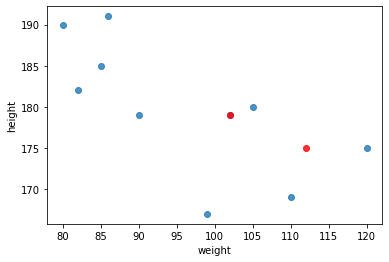

In [109]:
sns.regplot(df['weight'][:-1], df['height'][:-1], fit_reg=False);
sns.regplot(df['weight'][-2:], df['height'][-2:], fit_reg=False, color='red');

#### Calculating euclidean distance to the target point. 

In [100]:
x = df['weight'].map(lambda x: math.pow(x-df2['weight'].values, 2));
y = df['height'].map(lambda x: math.pow(x-df2['height'].values, 2));
df['euc_distance'] = (x+y).map(lambda x: math.sqrt(x))
df

,weight,height,normal,euc_distance
0,82,182,yes,30.805844
1,86,191,yes,30.528675
2,85,185,yes,28.792360
3,99,167,no,15.264338
4,110,169,no,6.324555
5,80,190,yes,35.341194
6,90,179,yes,22.360680
7,105,180,no,8.602325
8,120,175,no,8.000000
9,102,179,no,10.770330


#### Target class with k=3 - 'no'

In [107]:
df.sort_values(by=['euc_distance']).iloc[1:4, 2:3]

,normal
4,no
8,no
7,no
